In [1]:
using  Plots, LaTeXStrings

In [2]:
include("Master_func.jl")

# Quadrature rules
## trapezoidal rule
It works, wow, I'm so good


In [1]:
#f = x -> x.^10 .* exp(-x.^2); true_res = 945*sqrt(π)/32
a = 100; f = x -> cos(a*x).*exp(-x.^2); true_res = sqrt(pi)*exp(-a^2/4)
s = curv(x -> x, -10,10,x->1)

NN = 1000 - 1
res = zeros(NN)

for i1 = 1:NN
    res[i1] = Trap(f,s,i1+1) - true_res
end

plot((1:NN) .+ 1,abs.(res) .+ 10^(-17),yaxis =:log)

UndefVarError: UndefVarError: `curv` not defined

# Laguerre (works through Jacobi)

┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots C:\Users\wiets\.julia\packages\Plots\sxUvK\src\args.jl:1584


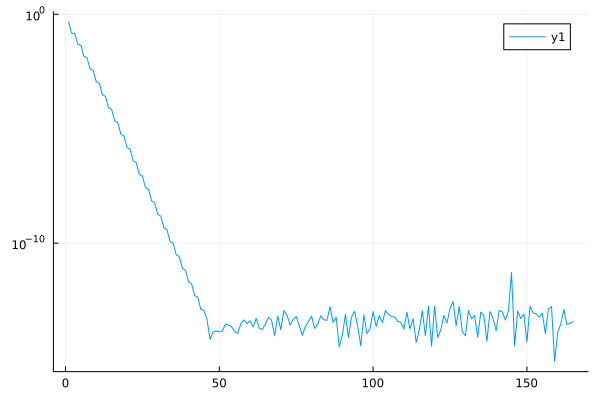

In [4]:
#Only goes to N = 165 quad points + not rounding error + slow
a = 2; f = x -> sin(a*x).*exp(-x)
s = curv(x->x,0,0,x->1)
NN = 165
res = zeros(NN)
for N = 2:NN+1
    res[N-1] = F_Laguerre_quad(f,s,N) - (a/(a^2+1))
end
plot(1:NN,abs.(res).+ 10^(-17),yscale =:log)

┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots C:\Users\wiets\.julia\packages\Plots\sxUvK\src\args.jl:1584


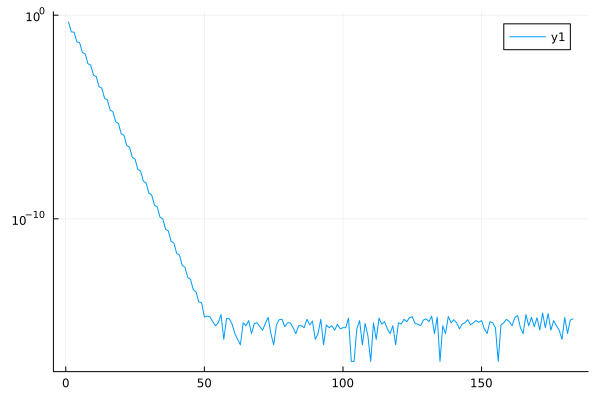

In [5]:
#Only goes to N = 183 quad points + rounding error + faster
a = 2; f = x -> sin(a*x).*exp(-x)
s = curv(x->x,0,0,x->1)
NN = 183
res = zeros(NN)

for N = 2:NN+1
    res[N-1] = Laguerre_quad(f,s,N) - (a/(a^2+1))
end
plot(1:NN,abs.(res).+ 10^(-17),yscale =:log)

┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots C:\Users\wiets\.julia\packages\Plots\sxUvK\src\args.jl:1584


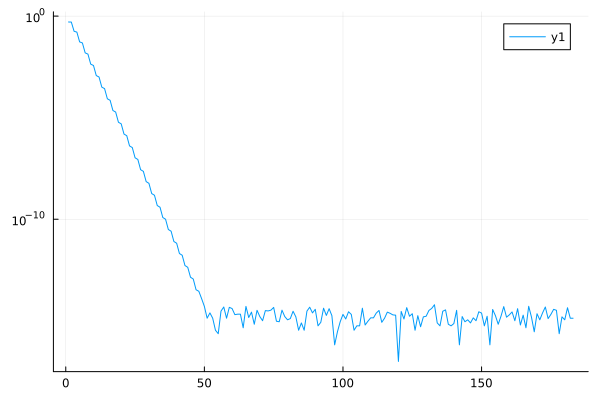

In [3]:
#Only goes to N = 183 quad points + rounding error + faster
a = 2; f = x -> cos(a*x).*exp(-abs.(x)); true_res = (2/(a^2+1))
s = curv(x->x,0,0,x->1)
NN = 183
res = zeros(NN)

for N = 2:NN+1
    res[N-1] = two_sided_Laguerre_quad(f,s,N) - (2/(a^2+1))
end
plot(1:NN,abs.(res).+ 10^(-17),yscale =:log)

# Hermite (works through Jacobi + 3-term recurrence)

┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots C:\Users\wiets\.julia\packages\Plots\sxUvK\src\args.jl:1584


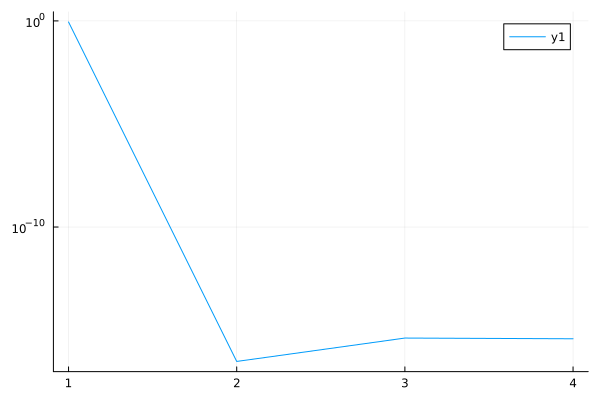

In [7]:
#Only goes to N = 4 (impressive)
#a = 10; f = x -> cos(a*x).*exp(-x.^2); true_res = sqrt(pi)*exp(-a^2/4)
f = x -> x.^4 .* exp(-x.^2); true_res = 3*sqrt(π)/4
s = curv(x->x,0,0,x->1)
NN = 4
res = zeros(NN)
for N = 2:NN+1
    res[N-1] = F_Hermite_quad(f,s,N)-true_res
end
plot(1:NN,abs.(res .+ 10^(-17)),yscale =:log)

160-element Vector{Float64}:
 -0.8862269254527579
  1.7763568394002505e-15
  4.440892098500626e-16
  5.551115123125783e-15
 -5.773159728050814e-15
  6.217248937900877e-15
  6.8833827526759706e-15
 -3.774758283725532e-15
  1.3322676295501878e-15
 -4.440892098500626e-15
 -4.440892098500626e-16
 -4.884981308350689e-15
  4.440892098500626e-15
  ⋮
  3.863576125695545e-14
  5.551115123125783e-15
 -6.8833827526759706e-15
  2.0872192862952943e-14
 -8.881784197001252e-16
  1.1546319456101628e-14
  7.105427357601002e-15
 -1.9984014443252818e-14
  4.440892098500626e-16
 -1.2212453270876722e-14
  0.0
 -1.1546319456101628e-14

┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots C:\Users\wiets\.julia\packages\Plots\sxUvK\src\args.jl:1584


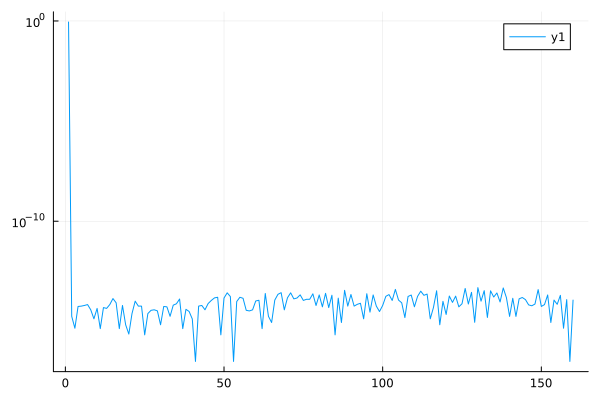

In [4]:
#Only goes to N = 145 (a little bit more than last time)
#a = 1; f = x -> cos(a*x).*exp(-x.^2); true_res = sqrt(pi)*exp(-a^2/4)
f = x -> x.^4 .* exp(-x.^2); true_res = 3*sqrt(π)/4
s = curv(x->x,0,0,x->1)
NN = 160
res = zeros(NN)
for N = 2:NN+1
    res[N-1] = Hermite_quad(f,s,N)-true_res
end
res |> display
plot(1:NN,abs.(res .+ 10^(-17)),yscale =:log)

In [5]:
@time Hermite_quad(f,s,3)-true_res

  0.000231 seconds (129 allocations: 8.234 KiB)


1.7763568394002505e-15

In [7]:
s = curv(x -> x, -10,10,x->1)
@time Trap(f,s,50)-true_res

  0.008298 seconds (1.80 k allocations: 106.203 KiB, 96.13% compilation time)


-4.440892098500626e-16

In [8]:
Trap(f,s,50)-true_res

-4.440892098500626e-16

In [9]:
Hermite_quad(f,s,4)-true_res

4.440892098500626e-16